### 1.1.1 Пример
> Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным:

In [59]:
# класс, который реализует перспетрон и его обучение
class Perceptron:
    def __init__(self,N):
        # создать нулевые веса
        self.w = list()
        for i in range(N):
            self.w.append(0)
    # метод для вычисления значения перспетрона
    def calc(self,x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i]*x[i]
        return res
    # пороговая функция активации персептрона
    def sign(self,x):
        if self.calc(x)>0:
            return 1
        else:
            return -1
    # обучение на одном примере
    def learn(self,la,x,y):
        # обучаем только, когда результат неверный
        if y*self.calc(x)<=0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i]+la*y*x[i]
    # обучение по всем данным T - кортеж примеров
    def learning(self,la,T):
        for n in range(100):
            # обучение по всем набору примеров
            for t in T:
                self.learn(la,t[0],t[1])

В строке 25 мы осуществляем корректировку весов. Посмотрим, как учится
и работает наш персептрон

In [60]:
# создаем класс двумерного персептрона
perceptron = Perceptron(2)
la = 0.1 # консанта обучения
# создаем примеры
T=list()
T.append([[2,1], 1])
T.append([[3,2], 1])
T.append([[4,1], 1])
T.append([[1,2], -1])
T.append([[2,3], -1])
T.append([[5,7], -1])
perceptron.learning(la,T) # обучение перспетрона
print(perceptron.w) # печатаем веса
# проверим работу на тестовых примерах
print (perceptron.sign([1.5, 2]))
print (perceptron.sign([3, 1.5]))
print (perceptron.sign([5, 1]))
print (perceptron.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


Видим, что что наш персептрон отлично научился распознавать образы, относя к классу 1 те вектора, у которых первая компонента больше второй, и к классу -1 в противном случае. Хотя устройство персептронов довольно простое эти конструкции могут решать и практические задачи. Кроме того, из таких персептронов состоят нейронные сети.

### 1.1.2 Пример
> Для написания кода нейрона будем использовать библиотеку Pytnon — NumPy:

In [61]:
import numpy as np
def sigmoid(x):
    # функцияя активации: f(x) = 1 / (1 + e^(-x))
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self,inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 =1
bias = 4                   # c = 4
n = Neuron(weights, bias)
x = np.array([2,3])        # x = 2, y =3
print(n.feedforward(x))    # 0.9990889488055994

0.9990889488055994


In [62]:
import numpy as np
class OurNeuralNetwork:
    '''
    Данные нейросети:
        -два входа
        -два нейрона в скрытых слоях (h1, h2)
        -выход(о1)
    Нейроны имеют идентичные веса и пороги:
        -w = [0,1]
        -b = 0
    '''
    def __init__(self):
        weights = np.array([0,1])
        bias = 0
        # класс neuron из предыдущего раздела
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # входы для о1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2,3])
print(network.feedforward(x)) # 0.7216325609518421

0.7216325609518421


## Задание 1.1.1.
> Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork. Данные нейросети:

- три входа (x_1,x_2,x_3 );
- три нейрона в скрытых слоях (h_1,h_2,h_3);
- выход (o_1).

> Нейроны имеют идентичные веса и пороги:

- w = [0.5,0.5,0.5]
- b = 0

> Данные нейросети:

- два входа (x_1,x_2);
- два нейрона в скрытых слоях (h_1,h_2);
- два выхода (o_1,o_2 ).

> Нейроны имеют идентичные веса и пороги:

- w = [1,0];
- b = 1.

In [63]:
import numpy as np
class OurNeuralNetwork:
    '''
    Данные нейросети:
        -два входа
        -два нейрона в скрытых слоях (h1, h2)
        -выход(о1)
    Нейроны имеют идентичные веса и пороги:
        -w = [0,1]
        -b = 0
    '''
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        # класс neuron из предыдущего раздела
        self.h1 = Neuron(weights,bias)
        self.h2 = Neuron(weights,bias)
        self.h3 = Neuron(weights,bias)
        self.o1 = Neuron(weights,bias)
    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h2.feedforward(x)
        # входы для о1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1

network = OurNeuralNetwork()
x = np.array([2,3,4])
print(network.feedforward(x)) # 0.7216325609518421

0.8151036049051821


## Задание 1.1.2.
Реализуйте классы нейронных сетей с использованием других функций активации.

In [64]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
weights = np.array([0,1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9990889488055994


In [65]:
import numpy as np
def tanh(x):
    return np.tanh(x)
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)
weights = np.array([0,1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

0.9999983369439447


In [66]:
import numpy as np
def ReLU(x):
    return max(0,x)
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)
weights = np.array([0,1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2,3])
print(n.feedforward(x))

7


### 1.2.1 Задание
> Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.

> Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

> а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = sns.load_dataset('iris')
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [68]:
dataset.shape

(150, 5)

In [69]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,:-1],
    dataset.iloc[:, -1],
    test_size = 0.20
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [71]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
63,6.1,2.9,4.7,1.4
73,6.1,2.8,4.7,1.2
97,6.2,2.9,4.3,1.3
24,4.8,3.4,1.9,0.2
51,6.4,3.2,4.5,1.5


In [72]:
y_train.head()

63    versicolor
73    versicolor
97    versicolor
24        setosa
51    versicolor
Name: species, dtype: object

In [73]:
from sklearn.datasets import load_digits, load_boston

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes: ', X_digits.shape, Y_digits.shape)

Dataset Sizes:  (1797, 64) (1797,)


In [74]:
boston = load_boston()
X_boston, Y_boston = boston.data, boston.target
print('Dataset Sizes: ', X_boston.shape, Y_boston.shape)

Dataset Sizes:  (506, 13) (506,)


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes:  (1437, 64) (360, 64) (1437,) (360,)


In [76]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(random_state=123)

In [77]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])
# метод score для оценки точноси моделей классификации
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test, Y_test))

print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy: 0.983
Training Accuracy: 1.000


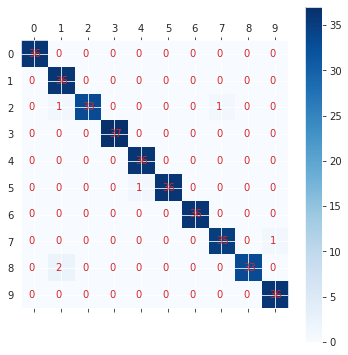

In [78]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar();
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2, j+0.1, str(conf_mat[j, i]), color='tab:red')

plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

In [79]:
# продолжение
import pandas as pd
import numpy as np
import matplotlib.pyplot as pls
url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
dataset.head()

print(dataset.shape)
dataset.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [80]:
from sklearn.tree import DecisionTreeRegressor
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print (X)
print (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes: (404, 13) (102, 13) (404,) (102,)


In [82]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [83]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
# метод score оценивает точность моделей классификации
print('Test Accuracy Score : %.3f'%mlp_regressor.score(X_test, Y_test))
print('Training Accuracy Score : %.3f'%mlp_regressor.score(X_train, Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test Accuracy Score : 0.462
Training Accuracy Score : 0.510


In [84]:
print('Loss:', mlp_regressor.loss_)

Loss: 28.538174061119612


In [85]:
print('Number of Coefs:', len(mlp_regressor.coefs_))
[weights.shape for weights in mlp_regressor.coefs_]

Number of Coefs: 2


[(13, 100), (100, 1)]

In [86]:
print('Number of Iterations for Which Estimator Ran:', mlp_regressor.n_iter_)
print('Name of Output Layer Activation Function:', mlp_regressor.out_activation_)

Number of Iterations for Which Estimator Ran: 130
Name of Output Layer Activation Function: identity
